<a href="https://colab.research.google.com/github/Joojina/project_final/blob/master/%EC%98%88%EC%B8%A1%EC%B9%98_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

In [0]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/usa_cut.csv', error_bad_lines=False, encoding='CP949')

In [0]:
df.drop(['imdb_title_id','original_title','date_published','duration','director','writer','production_company','actors','description','avg_vote','votes','metascore','reviews_from_users','reviews_from_critics'], axis=1, inplace=True)

In [0]:
df['genre_1'] = df.genre.str.split(',').str[0]
df['country_1'] = df.country.str.split(',').str[0]
df['language_1'] = df.language.str.split(',').str[0]

In [0]:
#df.dropna(0, inplace=True)
df.fillna(0, inplace=True)

In [0]:
df.head()

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 12 columns):
title                    5193 non-null object
year                     5193 non-null int64
genre                    5193 non-null object
country                  5193 non-null object
language                 5182 non-null object
budget                   2822 non-null float64
usa_gross_income         5193 non-null int64
worlwide_gross_income    5193 non-null int64
s_year                   5193 non-null object
genre_1                  5193 non-null object
country_1                5193 non-null object
language_1               5182 non-null object
dtypes: float64(1), int64(3), object(8)
memory usage: 487.0+ KB


In [0]:
df.columns

Index(['title', 'year', 'genre', 'country', 'language', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 's_year', 'genre_1',
       'country_1', 'language_1'],
      dtype='object')

In [0]:
# 국가별 수익 상위 10개국
df.groupby('country_1')['worlwide_gross_income'].sum().sort_values(ascending=False)[:10] 

country_1
USA            4.001883e+11
UK             4.566305e+10
China          1.953642e+10
France         1.014444e+10
Germany        7.583661e+09
Canada         6.190177e+09
New Zealand    5.784122e+09
Japan          5.531024e+09
South Korea    3.385444e+09
Australia      3.085293e+09
Name: worlwide_gross_income, dtype: float64

In [0]:
# 00년, 10년대로 넘어올수록 장르가 다양해짐
df.groupby('s_year')['genre_1'].count().sort_values(ascending=False)[:] 

s_year
10s    1869
00s    1653
90s     970
80s     701
Name: genre_1, dtype: int64

In [0]:
df.s_year.tolist()

In [0]:
df.groupby('country_1')['s_year'].count().sort_values(ascending=False)[:]

country_1
USA            1500
UK             1182
France          787
India           421
Canada          335
Japan           238
Germany         234
China           209
Australia       144
South Korea     143
Name: s_year, dtype: int64

In [0]:
df.groupby('genre_1')['country_1'].count().sort_values(ascending=False)[:] 

genre_1
Drama        1326
Comedy       1224
Action       1134
Animation     372
Biography     316
Crime         312
Adventure     255
Horror        147
Thriller       23
Romance        22
Mystery        20
Fantasy        18
Musical         8
Family          8
Sci-Fi          4
Western         1
War             1
History         1
Film-Noir       1
Name: country_1, dtype: int64

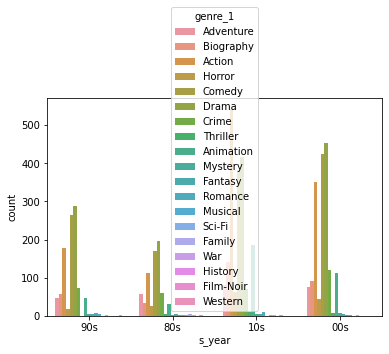

In [0]:
sns.countplot(x='s_year', data=df, hue='genre_1')
# 10s: Action, Comedy, Drama 00s: Comedy, Drama, Action 90s: Comedy, Action, Drama   

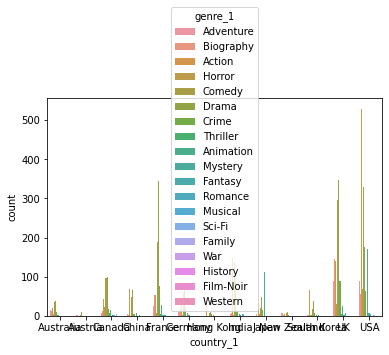

In [0]:
sns.countplot(x='country_1', data=df, hue='genre_1')

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [0]:
from sklearn.preprocessing import StandardScaler



In [0]:
df.fillna(0, inplace=True)

In [0]:
scaler = StandardScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)
np.mean(X_scaled), np.std(X_scaled)

(-3.151839138386915e-17, 0.9999999999999999)

# 결정트리 - 세대별
 


In [0]:
df.drop(['title', 'year', 'genre', 'country', 'language','genre_1','country_1','language_1'], axis=1, inplace=True)

In [0]:
df.columns

Index(['budget', 'usa_gross_income', 'worlwide_gross_income', 's_year'], dtype='object')

In [0]:
y = df['s_year']
x = df.drop('s_year', axis=1)

In [0]:
# 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, \
                                                    random_state=111)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [0]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions = tree.predict(x_test)
predictions

array(['10s', '10s', '90s', ..., '80s', '00s', '90s'], dtype=object)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         00s       0.42      0.42      0.42       345
         10s       0.52      0.52      0.52       373
         80s       0.36      0.34      0.35       130
         90s       0.38      0.40      0.39       191

    accuracy                           0.44      1039
   macro avg       0.42      0.42      0.42      1039
weighted avg       0.44      0.44      0.44      1039



# 결정트리 - 장르별

In [0]:
df.drop(['title', 'year', 'genre', 'country', 'language','country_1','language_1','s_year'], axis=1, inplace=True)

In [0]:
df.columns

Index(['budget', 'usa_gross_income', 'worlwide_gross_income', 'genre_1'], dtype='object')

In [0]:
y = df['genre_1']
x = df.drop('genre_1', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, \
                                                    random_state=111)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
predictions

array(['Action', 'Drama', 'Comedy', ..., 'Action', 'Drama', 'Action'],
      dtype=object)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      Action       0.36      0.38      0.37       209
   Adventure       0.09      0.10      0.09        52
   Animation       0.21      0.17      0.19        84
   Biography       0.09      0.08      0.09        72
      Comedy       0.29      0.36      0.32       219
       Crime       0.08      0.06      0.07        67
       Drama       0.39      0.34      0.37       288
      Family       0.00      0.00      0.00         1
     Fantasy       0.00      0.00      0.00         3
      Horror       0.10      0.10      0.10        29
     Musical       0.00      0.00      0.00         1
     Mystery       0.00      0.00      0.00         4
     Romance       0.00      0.00      0.00         4
      Sci-Fi       0.00      0.00      0.00         0
    Thriller       0.00      0.00      0.00         6

    accuracy                           0.28      1039
   macro avg       0.11      0.11      0.11      1039
weighted avg       0.28   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 결정트리 - 국가별

In [0]:
df.drop(['title', 'year', 'genre', 'country', 'language','language_1','s_year','genre_1'], axis=1, inplace=True)

In [0]:
df.columns

Index(['budget', 'usa_gross_income', 'worlwide_gross_income', 'country_1'], dtype='object')

In [0]:
df.drop(['budget'], axis=1, inplace=True)

In [0]:
df.fillna(0, inplace=True)

In [0]:
y = df['country_1']
x = df.drop('country_1', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, \
                                                    random_state=111)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
predictions = tree.predict(x_test)
predictions

array(['South Korea', 'India', 'UK', ..., 'Australia', 'India', 'France'],
      dtype=object)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

   Australia       0.05      0.06      0.05        34
      Canada       0.16      0.18      0.17        68
       China       0.28      0.29      0.29        38
      France       0.25      0.29      0.27       156
     Germany       0.08      0.09      0.09        44
       India       0.32      0.34      0.33        91
       Japan       0.21      0.17      0.19        54
 South Korea       0.15      0.14      0.15        28
          UK       0.42      0.36      0.39       246
         USA       0.86      0.88      0.87       280

    accuracy                           0.43      1039
   macro avg       0.28      0.28      0.28      1039
weighted avg       0.44      0.43      0.44      1039

